In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('tabular_data/cleaned_all.csv')
df.head()

,unified_id,stellar_id,disposition,orbital_period_days,transit_duration_hr,transit_depth_ppm,planet_radius_rearth,equilibrium_temp_k,insolation_flux_earth,stellar_teff_k,stellar_radius_rsun,stellar_logg_cgs,magnitude,mission
0,K00752.01,10797460,CONFIRMED,9.488036,2.95750,615.8,2.26,793.0,93.59,5455.0,0.927,4.467,15.347,KEPLER
1,K00752.02,10797460,CONFIRMED,54.418383,4.50700,874.8,2.83,443.0,9.11,5455.0,0.927,4.467,15.347,KEPLER
2,K00753.01,10811496,CANDIDATE,19.899140,1.78220,10829.0,14.60,638.0,39.30,5853.0,0.868,4.544,15.436,KEPLER
3,K00754.01,10848459,FALSE_POSITIVE,1.736952,2.40641,8079.2,33.46,1395.0,891.96,5805.0,0.791,4.564,15.597,KEPLER
4,K00755.01,10854555,CONFIRMED,2.525592,1.65450,603.3,2.75,1406.0,926.16,6031.0,1.046,4.438,15.509,KEPLER


In [4]:
df = df.drop(columns=['unified_id', 'stellar_id', 'mission'])
df.head()

,disposition,orbital_period_days,transit_duration_hr,transit_depth_ppm,planet_radius_rearth,equilibrium_temp_k,insolation_flux_earth,stellar_teff_k,stellar_radius_rsun,stellar_logg_cgs,magnitude
0,CONFIRMED,9.488036,2.95750,615.8,2.26,793.0,93.59,5455.0,0.927,4.467,15.347
1,CONFIRMED,54.418383,4.50700,874.8,2.83,443.0,9.11,5455.0,0.927,4.467,15.347
2,CANDIDATE,19.899140,1.78220,10829.0,14.60,638.0,39.30,5853.0,0.868,4.544,15.436
3,FALSE_POSITIVE,1.736952,2.40641,8079.2,33.46,1395.0,891.96,5805.0,0.791,4.564,15.597
4,CONFIRMED,2.525592,1.65450,603.3,2.75,1406.0,926.16,6031.0,1.046,4.438,15.509


In [5]:
df = df[df['disposition'] != 'CANDIDATE']
df.head()

,disposition,orbital_period_days,transit_duration_hr,transit_depth_ppm,planet_radius_rearth,equilibrium_temp_k,insolation_flux_earth,stellar_teff_k,stellar_radius_rsun,stellar_logg_cgs,magnitude
0,CONFIRMED,9.488036,2.95750,615.8,2.26,793.0,93.59,5455.0,0.927,4.467,15.347
1,CONFIRMED,54.418383,4.50700,874.8,2.83,443.0,9.11,5455.0,0.927,4.467,15.347
3,FALSE_POSITIVE,1.736952,2.40641,8079.2,33.46,1395.0,891.96,5805.0,0.791,4.564,15.597
4,CONFIRMED,2.525592,1.65450,603.3,2.75,1406.0,926.16,6031.0,1.046,4.438,15.509
5,CONFIRMED,11.094321,4.59450,1517.5,3.90,835.0,114.81,6046.0,0.972,4.486,15.714


In [6]:
df['disposition'] = df['disposition'].map({'FALSE_POSITIVE': 0, 'CONFIRMED': 1})
df.head()

,disposition,orbital_period_days,transit_duration_hr,transit_depth_ppm,planet_radius_rearth,equilibrium_temp_k,insolation_flux_earth,stellar_teff_k,stellar_radius_rsun,stellar_logg_cgs,magnitude
0,1,9.488036,2.95750,615.8,2.26,793.0,93.59,5455.0,0.927,4.467,15.347
1,1,54.418383,4.50700,874.8,2.83,443.0,9.11,5455.0,0.927,4.467,15.347
3,0,1.736952,2.40641,8079.2,33.46,1395.0,891.96,5805.0,0.791,4.564,15.597
4,1,2.525592,1.65450,603.3,2.75,1406.0,926.16,6031.0,1.046,4.438,15.509
5,1,11.094321,4.59450,1517.5,3.90,835.0,114.81,6046.0,0.972,4.486,15.714


In [7]:
df.dtypes

disposition                int64
orbital_period_days      float64
transit_duration_hr      float64
transit_depth_ppm        float64
planet_radius_rearth     float64
equilibrium_temp_k       float64
insolation_flux_earth    float64
stellar_teff_k           float64
stellar_radius_rsun      float64
stellar_logg_cgs         float64
magnitude                float64
dtype: object

In [8]:
importances = df.drop(columns='disposition').corrwith(df['disposition']).abs().sort_values(ascending=False)
most_influential_col = importances.index[0]
print(f"The column that influences 'disposition' the most is: {most_influential_col}")
importances

The column that influences 'disposition' the most is: equilibrium_temp_k


equilibrium_temp_k       0.284579
stellar_teff_k           0.237828
stellar_logg_cgs         0.212189
transit_depth_ppm        0.208682
transit_duration_hr      0.154622
orbital_period_days      0.133483
stellar_radius_rsun      0.094352
magnitude                0.078021
insolation_flux_earth    0.041722
planet_radius_rearth     0.023072
dtype: float64

## XGBoost

In [11]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Features and target
X = df.drop(columns='disposition')
y = df['disposition']

# Split into train (70%), validation (15%), test (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Train XGBoost model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)

# Validation performance
y_val_pred = model.predict(X_val)
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred))

/home/syntropy/NASA/globalnom1/exoplantropy/nasa-venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [12:50:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Validation Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.90      0.91       957
           1       0.86      0.90      0.88       689

    accuracy                           0.90      1646
   macro avg       0.89      0.90      0.90      1646
weighted avg       0.90      0.90      0.90      1646



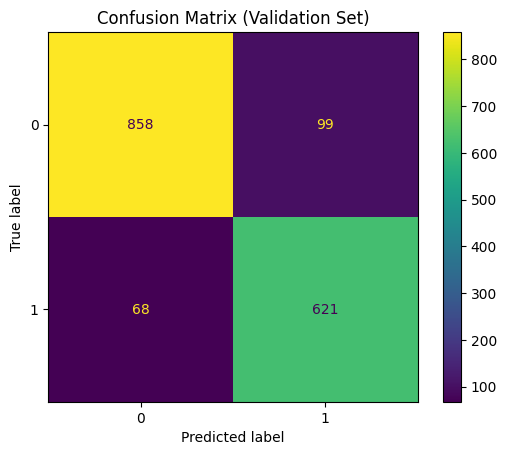

In [12]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X_val, y_val)
plt.title("Confusion Matrix (Validation Set)")
plt.show()